# Amsterdam House Price Prediction

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# loading the dataset
df_ams=pd.read_csv('amsterdamMerged.csv')  

In [3]:
df_ams.head()

,File,URL,TITLE,LOCATION,PRICE PER MONTH,AREA IN m²,NUMBER OF ROOMS,INTERIOR,DESCRIPTION,OFFERED SINCE,...,NUMBER OF BEDROOMS,NUMBER OF BATHROOMS,NUMBER OF FLOORS,DETAILS OF BALCONY,DETAILS OF GARDEN,DETAILS OF STORAGE,DESCRIPTION OF STORAGE,GARAGE,CONTACT DETAILS,TIMESTAMP
0,amsterdam_1.csv,https://www.pararius.com/apartment-for-rent/am...,Apartment Kerkstraat 127 B,1017 GE (Grachtengordel-Zuid),2400,84,3,Upholstered or furnished,"Luxurious, fully furnished, Penthouse apartmen...",3 weeks,...,2,1,1,Not present,Details of garden is not available,Details of storage is not available,Details of description of the storage is not a...,Yes,https://www.pararius.com/contact/700dc064/amst...,2022-08-03 17:22:07
1,amsterdam_1.csv,https://www.pararius.com/apartment-for-rent/am...,Apartment Prinsengracht 625 2,1016 HV (Grachtengordel-West),3250,120,4,Upholstered,NEW FOR RENT!,7 weeks,...,2,1,3,Not present,Details of garden is not available,Details of storage is not available,Details of description of the storage is not a...,Yes,https://www.pararius.com/contact/92cde2d7/amst...,2022-08-03 17:23:56
2,amsterdam_1.csv,https://www.pararius.com/apartment-for-rent/am...,Apartment Prinsengracht 701 2A,1017 JV (Grachtengordel-Zuid),2050,60,2,Upholstered or furnished,Exclusively for rent at de Hollandsche Makelaa...,23-07-2022,...,1,1,1,Not present,Details of garden is not available,Details of storage is not available,Details of description of the storage is not a...,Yes,https://www.pararius.com/contact/3c0d0f7e/amst...,2022-08-03 17:26:13
3,amsterdam_1.csv,https://www.pararius.com/apartment-for-rent/am...,Apartment Leliegracht 12 1,1015 DE (Grachtengordel-West),2250,95,2,Furnished,Maximum 6 Months,3+ months,...,1,1,1,Not present,Details of garden is not available,Details of storage is not available,Details of description of the storage is not a...,Details of garage is not available,https://www.pararius.com/contact/2bd720f0/amst...,2022-08-03 17:27:21
4,amsterdam_8.csv,https://www.pararius.com/apartment-for-rent/am...,Apartment Nieuwe Leliestraat 66 H,1015 SV (Jordaan),2750,78,3,Upholstered or furnished,Living in a historical building in famous Jord...,10-08-2022,...,2,1,2,Not present,"Present (15 m², located on the north-west)",Details of storage is not available,Details of description of the storage is not a...,Yes,https://www.pararius.com/contact/06f2c6e0/amst...,2022-08-10


In [4]:
df_ams.columns

Index(['File', 'URL', 'TITLE', 'LOCATION', 'PRICE PER MONTH', 'AREA IN m²',
       'NUMBER OF ROOMS', 'INTERIOR', 'DESCRIPTION', 'OFFERED SINCE',
       'AVAILABILITY', 'SPECIFICATION', 'UPKEEP STATUS', 'VOLUME', 'TYPE',
       'CONSTRUCTION TYPE', 'CONSTRUCTION YEAR', 'LOCATION TYPE',
       'NUMBER OF BEDROOMS', 'NUMBER OF BATHROOMS', 'NUMBER OF FLOORS',
       'DETAILS OF BALCONY', 'DETAILS OF GARDEN', 'DETAILS OF STORAGE',
       'DESCRIPTION OF STORAGE', 'GARAGE', 'CONTACT DETAILS', 'TIMESTAMP'],
      dtype='object')

In [5]:
df_ams.rename(columns = {'AREA IN m²':'AREA IN SQ METRE'}, inplace = True)   
df_ams.columns

Index(['File', 'URL', 'TITLE', 'LOCATION', 'PRICE PER MONTH',
       'AREA IN SQ METRE', 'NUMBER OF ROOMS', 'INTERIOR', 'DESCRIPTION',
       'OFFERED SINCE', 'AVAILABILITY', 'SPECIFICATION', 'UPKEEP STATUS',
       'VOLUME', 'TYPE', 'CONSTRUCTION TYPE', 'CONSTRUCTION YEAR',
       'LOCATION TYPE', 'NUMBER OF BEDROOMS', 'NUMBER OF BATHROOMS',
       'NUMBER OF FLOORS', 'DETAILS OF BALCONY', 'DETAILS OF GARDEN',
       'DETAILS OF STORAGE', 'DESCRIPTION OF STORAGE', 'GARAGE',
       'CONTACT DETAILS', 'TIMESTAMP'],
      dtype='object')

In [6]:
df_ams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   File                    992 non-null    object
 1   URL                     992 non-null    object
 2   TITLE                   992 non-null    object
 3   LOCATION                992 non-null    object
 4   PRICE PER MONTH         992 non-null    int64 
 5   AREA IN SQ METRE        992 non-null    int64 
 6   NUMBER OF ROOMS         992 non-null    int64 
 7   INTERIOR                992 non-null    object
 8   DESCRIPTION             992 non-null    object
 9   OFFERED SINCE           992 non-null    object
 10  AVAILABILITY            992 non-null    object
 11  SPECIFICATION           992 non-null    object
 12  UPKEEP STATUS           992 non-null    object
 13  VOLUME                  992 non-null    object
 14  TYPE                    992 non-null    object
 15  CONSTR

In [7]:
df_ams.describe()

,PRICE PER MONTH,AREA IN SQ METRE,NUMBER OF ROOMS,CONSTRUCTION YEAR
count,992.000000,992.000000,992.000000,992.000000
mean,2647.028226,95.846774,3.231855,1934.740927
std,1326.906610,46.478913,1.206555,97.779249
min,440.000000,18.000000,1.000000,1005.000000
25%,1850.000000,67.000000,3.000000,1906.000000
50%,2350.000000,87.000000,3.000000,1934.000000
75%,2950.000000,111.250000,4.000000,2001.000000
max,13500.000000,536.000000,12.000000,2022.000000


In [8]:
df_ams.dtypes

File                      object
URL                       object
TITLE                     object
LOCATION                  object
PRICE PER MONTH            int64
AREA IN SQ METRE           int64
NUMBER OF ROOMS            int64
INTERIOR                  object
DESCRIPTION               object
OFFERED SINCE             object
AVAILABILITY              object
SPECIFICATION             object
UPKEEP STATUS             object
VOLUME                    object
TYPE                      object
CONSTRUCTION TYPE         object
CONSTRUCTION YEAR          int64
LOCATION TYPE             object
NUMBER OF BEDROOMS        object
NUMBER OF BATHROOMS       object
NUMBER OF FLOORS          object
DETAILS OF BALCONY        object
DETAILS OF GARDEN         object
DETAILS OF STORAGE        object
DESCRIPTION OF STORAGE    object
GARAGE                    object
CONTACT DETAILS           object
TIMESTAMP                 object
dtype: object

In [9]:
# replacing columns that are not taken for further analysis
df_ams.drop(columns=['TITLE','File','URL','OFFERED SINCE','CONTACT DETAILS','TIMESTAMP','DESCRIPTION'],axis=1,inplace=True)

In [10]:
# Missing Values

In [11]:
# replacing all non available datas with NaN
df_ams['INTERIOR'] = df_ams['INTERIOR'].replace('Interior is not available',np.nan)
df_ams['AVAILABILITY'] = df_ams['AVAILABILITY'].replace('Not available to book',np.nan)
df_ams['SPECIFICATION'] = df_ams['SPECIFICATION'].replace('Specifics are not available',np.nan)
df_ams['UPKEEP STATUS'] = df_ams['UPKEEP STATUS'].replace('Upkeep is not available',np.nan)
df_ams['VOLUME'] = df_ams['VOLUME'].replace('Volume is not available',np.nan)
df_ams['LOCATION TYPE'] = df_ams['LOCATION TYPE'].replace('Location type is not available',np.nan)
df_ams['NUMBER OF BEDROOMS'] = df_ams['NUMBER OF BEDROOMS'].replace('Number of bedrooms is not available',np.nan)
df_ams['NUMBER OF BATHROOMS'] = df_ams['NUMBER OF BATHROOMS'].replace('Number of bathrooms is not available',np.nan)
df_ams['NUMBER OF FLOORS'] = df_ams['NUMBER OF FLOORS'].replace('Number of floors is not available',np.nan)
df_ams['DETAILS OF BALCONY'] = df_ams['DETAILS OF BALCONY'].replace('Details of balcony is not available',np.nan)
df_ams['DETAILS OF GARDEN'] = df_ams['DETAILS OF GARDEN'].replace('Details of garden is not available',np.nan)
df_ams['DETAILS OF STORAGE'] = df_ams['DETAILS OF STORAGE'].replace('Details of storage is not available',np.nan)
df_ams['DESCRIPTION OF STORAGE'] = df_ams['DESCRIPTION OF STORAGE'].replace('Details of description of the storage is not available',np.nan)
df_ams['GARAGE'] = df_ams['GARAGE'].replace('Details of garage is not available',np.nan)


In [12]:
# creating a list of columns with null values
df_col_null = df_ams.columns[df_ams.isna().any()==True].tolist()

In [13]:
df_ams[df_col_null].isna().sum()

INTERIOR                  166
AVAILABILITY              383
SPECIFICATION             898
UPKEEP STATUS             234
VOLUME                     61
LOCATION TYPE             786
NUMBER OF BEDROOMS         19
NUMBER OF BATHROOMS       189
NUMBER OF FLOORS           50
DETAILS OF BALCONY        154
DETAILS OF GARDEN         565
DETAILS OF STORAGE        564
DESCRIPTION OF STORAGE    853
GARAGE                    106
dtype: int64

In [14]:
# dropping columns with less data available
df_ams.drop(columns=['AVAILABILITY','SPECIFICATION','LOCATION TYPE','DESCRIPTION OF STORAGE'],axis=1,inplace=True)

In [15]:
# filling null values of each column with the mode of respective column
df_ams['VOLUME'].fillna(df_ams['VOLUME'].mode()[0],inplace=True)
df_ams['NUMBER OF BEDROOMS'].fillna(df_ams['NUMBER OF BEDROOMS'].mode()[0],inplace=True)
df_ams['NUMBER OF BATHROOMS'].fillna(df_ams['NUMBER OF BATHROOMS'].mode()[0],inplace=True)  
df_ams['NUMBER OF FLOORS'].fillna(df_ams['NUMBER OF FLOORS'].mode()[0],inplace=True)
df_ams['GARAGE'].fillna(df_ams['GARAGE'].mode()[0],inplace=True)
df_ams['DETAILS OF BALCONY'].fillna(df_ams['DETAILS OF BALCONY'].mode()[0],inplace=True)
df_ams['UPKEEP STATUS'].fillna(df_ams['UPKEEP STATUS'].mode()[0],inplace=True)
df_ams['INTERIOR'].fillna(df_ams['INTERIOR'].mode()[0],inplace=True)
df_ams['DETAILS OF STORAGE'].fillna(df_ams['DETAILS OF STORAGE'].mode()[0],inplace=True)
df_ams['DETAILS OF GARDEN'].fillna(df_ams['DETAILS OF GARDEN'].mode()[0],inplace=True)

# Feature Engineering

In [16]:
df_ams['DETAILS OF GARDEN'].unique()
# availability of garden,area of garden,location of garden can be extracted from this column

array(['Not present', 'Present (15 m², located on the north-west)',
       'Present (25 m²)', 'Present (118 m², located on the north-east)',
       'Present (221 m², located on the west)', 'Present (44 m²)',
       'Present (96 m²)', 'Present',
       'Present (10 m², located on the north)', 'Present (47 m²)',
       'Present (located on the south-east)',
       'Present (90 m², located on the south)',
       'Present (12 m², located on the north)', 'Present (16 m²)',
       'Present (25 m², located on the north-west)', 'Present (12 m²)',
       'Present (30 m², located on the north)',
       'Present (11 m², located on the south-west)', 'Present (50 m²)',
       'Present (7 m²)', 'Present (60 m², located on the south)',
       'Present (50 m², located on the south-west)',
       'Present (100 m², located on the south-west)',
       'Present (42 m², located on the north-east)', 'Present (10 m²)',
       'Present (located on the south)', 'Present (35 m²)',
       'Present (120 m², locat

In [17]:
# splitting the column into 2 different columns with '('
df_ams[["AVAILABILITY OF GARDEN",'AREA OF GARDEN']] = df_ams["DETAILS OF GARDEN"].str.split("(", expand = True)

In [18]:
df_ams[["AVAILABILITY OF GARDEN",'AREA OF GARDEN']].head()

,AVAILABILITY OF GARDEN,AREA OF GARDEN
0,Not present,None
1,Not present,None
2,Not present,None
3,Not present,None
4,Present,"15 m², located on the north-west)"


In [19]:
df_ams['AVAILABILITY OF GARDEN'].unique()

array(['Not present', 'Present ', 'Present'], dtype=object)

In [20]:
df_ams['AVAILABILITY OF GARDEN']=df_ams['AVAILABILITY OF GARDEN'].replace(['Present '],'Present')

In [21]:
# splitting the column 'Area of Garden' into 2 different columns of area and location
df_ams[['AREA OF GARDEN IN SQ METRE','g1']] = df_ams["AREA OF GARDEN"].str.split("m²", expand = True)

In [22]:
df_ams[['AREA OF GARDEN IN SQ METRE','g1']].head()

,AREA OF GARDEN IN SQ METRE,g1
0,None,None
1,None,None
2,None,None
3,None,None
4,15,", located on the north-west)"


In [23]:
df_ams.drop(columns=['AREA OF GARDEN','DETAILS OF GARDEN'],axis=1,inplace=True) 

In [24]:
df_ams.rename(columns={'g1':'GARDEN LOCATION'},inplace=True)
df_ams['GARDEN LOCATION'].unique()

array([None, ', located on the north-west)', ')',
       ', located on the north-east)', ', located on the west)',
       ', located on the north)', ', located on the south)',
       ', located on the south-west)', ', located on the east)',
       ', located on the south-east)'], dtype=object)

In [25]:
# removing unnecessary characters from the string
df_ams['GARDEN LOCATION'] = df_ams['GARDEN LOCATION'].str[1:-1]
df_ams['GARDEN LOCATION'].unique()

array([None, ' located on the north-west', '',
       ' located on the north-east', ' located on the west',
       ' located on the north', ' located on the south',
       ' located on the south-west', ' located on the east',
       ' located on the south-east'], dtype=object)

In [26]:
df_ams['GARDEN LOCATION'] = df_ams['GARDEN LOCATION'].replace('',np.nan)

In [27]:
# number similar to pin available and splitting it from the column 'location'
df_ams['LOCATION'].head()

0    1017 GE (Grachtengordel-Zuid)
1    1016 HV (Grachtengordel-West)
2    1017 JV (Grachtengordel-Zuid)
3    1015 DE (Grachtengordel-West)
4                1015 SV (Jordaan)
Name: LOCATION, dtype: object

In [28]:
df_ams[['LOCATION PIN','A','B','C','D']] = df_ams["LOCATION"].str.split(" ", expand = True)
df_ams[['LOCATION PIN','A','B','C','D']]

,LOCATION PIN,A,B,C,D
0,1017,GE,(Grachtengordel-Zuid),None,None
1,1016,HV,(Grachtengordel-West),None,None
2,1017,JV,(Grachtengordel-Zuid),None,None
3,1015,DE,(Grachtengordel-West),None,None
4,1015,SV,(Jordaan),None,None
...,...,...,...,...,...
987,1019,XZ,(Oostelijk,Havengebied),None
988,1033,PG,(Noordelijke,IJ-oevers,West)
989,1031,KE,(Noordelijke,IJ-oevers,West)
990,1031,HD,(Noordelijke,IJ-oevers,West)


In [29]:
# dropping all other columns after keeping the pin column
df_ams.drop(columns=['A','B','C','D','LOCATION'],axis=1,inplace=True)

In [30]:
df_ams.columns

Index(['PRICE PER MONTH', 'AREA IN SQ METRE', 'NUMBER OF ROOMS', 'INTERIOR',
       'UPKEEP STATUS', 'VOLUME', 'TYPE', 'CONSTRUCTION TYPE',
       'CONSTRUCTION YEAR', 'NUMBER OF BEDROOMS', 'NUMBER OF BATHROOMS',
       'NUMBER OF FLOORS', 'DETAILS OF BALCONY', 'DETAILS OF STORAGE',
       'GARAGE', 'AVAILABILITY OF GARDEN', 'AREA OF GARDEN IN SQ METRE',
       'GARDEN LOCATION', 'LOCATION PIN'],
      dtype='object')

In [31]:
df_col_null = df_ams.columns[df_ams.isna().any()==True].tolist()
df_ams[df_col_null].isna().sum()

AREA OF GARDEN IN SQ METRE    893
GARDEN LOCATION               953
dtype: int64

In [32]:
# removing columns because of low availability of data
df_ams.drop(columns=['AREA OF GARDEN IN SQ METRE','GARDEN LOCATION'],axis=1,inplace=True)

In [33]:
# filling null values with the mode value
df_ams['AVAILABILITY OF GARDEN'].fillna(df_ams['AVAILABILITY OF GARDEN'].mode()[0],inplace=True)

In [34]:
df_ams.columns

Index(['PRICE PER MONTH', 'AREA IN SQ METRE', 'NUMBER OF ROOMS', 'INTERIOR',
       'UPKEEP STATUS', 'VOLUME', 'TYPE', 'CONSTRUCTION TYPE',
       'CONSTRUCTION YEAR', 'NUMBER OF BEDROOMS', 'NUMBER OF BATHROOMS',
       'NUMBER OF FLOORS', 'DETAILS OF BALCONY', 'DETAILS OF STORAGE',
       'GARAGE', 'AVAILABILITY OF GARDEN', 'LOCATION PIN'],
      dtype='object')

# Categorical Features

In [35]:
# LABEL ENCODING

In [36]:
df_ams['UPKEEP STATUS'].unique()

array(['Good', 'Excellent', 'Reasonable'], dtype=object)

In [37]:
df_ams['TYPE'].unique()

array(['Apartment', 'House', 'Studio'], dtype=object)

In [38]:
df_ams['INTERIOR'].unique()

array(['Upholstered or furnished', 'Upholstered', 'Furnished', 'Shell'],
      dtype=object)

In [39]:
# encoding categories into 0,1,2,...
le = LabelEncoder()
df_ams['INTERIOR']=le.fit_transform(df_ams['INTERIOR'])
df_ams['TYPE']=le.fit_transform(df_ams['TYPE'])
df_ams['UPKEEP STATUS']=le.fit_transform(df_ams['UPKEEP STATUS'])

In [40]:
# ONE HOT ENCODING

In [41]:
df_ams['DETAILS OF BALCONY'].unique()

array(['Not present', 'Present'], dtype=object)

In [42]:
df_ams['GARAGE'].unique()

array(['Yes', 'No'], dtype=object)

In [43]:
df_ams['DETAILS OF STORAGE'].unique()

array(['Not present', 'Present'], dtype=object)

In [44]:
df_ams['CONSTRUCTION TYPE'].unique()

array(['Existing building', 'New development'], dtype=object)

In [45]:
dum_cols=df_ams[['DETAILS OF BALCONY','GARAGE','DETAILS OF STORAGE','CONSTRUCTION TYPE','AVAILABILITY OF GARDEN']]

In [46]:
# encoding categories into binary values
dum_ams=pd.get_dummies(dum_cols)
dum_ams

,DETAILS OF BALCONY_Not present,DETAILS OF BALCONY_Present,GARAGE_No,GARAGE_Yes,DETAILS OF STORAGE_Not present,DETAILS OF STORAGE_Present,CONSTRUCTION TYPE_Existing building,CONSTRUCTION TYPE_New development,AVAILABILITY OF GARDEN_Not present,AVAILABILITY OF GARDEN_Present
0,1,0,0,1,1,0,1,0,1,0
1,1,0,0,1,1,0,1,0,1,0
2,1,0,0,1,1,0,1,0,1,0
3,1,0,0,1,1,0,1,0,1,0
4,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
987,0,1,1,0,1,0,0,1,1,0
988,0,1,1,0,1,0,0,1,1,0
989,0,1,0,1,0,1,1,0,1,0
990,0,1,1,0,1,0,0,1,1,0


In [47]:
dum_ams.drop(columns=['DETAILS OF BALCONY_Not present','GARAGE_No','DETAILS OF STORAGE_Not present','CONSTRUCTION TYPE_Existing building','AVAILABILITY OF GARDEN_Not present'],axis=1,inplace=True)

In [48]:
dum_ams.rename(columns={'DETAILS OF BALCONY_Present':'AVAILABILITY OF BALCONY','GARAGE_Yes':'AVAILABILITY OF GARAGE','DETAILS OF STORAGE_Present':'AVAILABILITY OF STORAGE','CONSTRUCTION TYPE_New development':'NEW BUILDING','AVAILABILITY OF GARDEN_Present':'AVAILABILITY OF GARDEN'},inplace=True)

In [49]:
dum_ams

,AVAILABILITY OF BALCONY,AVAILABILITY OF GARAGE,AVAILABILITY OF STORAGE,NEW BUILDING,AVAILABILITY OF GARDEN
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,1
...,...,...,...,...,...
987,1,0,0,1,0
988,1,0,0,1,0
989,1,1,1,0,0
990,1,0,0,1,0


In [50]:
# removing columns which have been already encoded
df_ams.drop(columns=['DETAILS OF BALCONY','GARAGE','DETAILS OF STORAGE','CONSTRUCTION TYPE','AVAILABILITY OF GARDEN'],axis=1,inplace=True)
df_ams=pd.concat((df_ams,dum_ams),axis=1)
df_ams.head()

,PRICE PER MONTH,AREA IN SQ METRE,NUMBER OF ROOMS,INTERIOR,UPKEEP STATUS,VOLUME,TYPE,CONSTRUCTION YEAR,NUMBER OF BEDROOMS,NUMBER OF BATHROOMS,NUMBER OF FLOORS,LOCATION PIN,AVAILABILITY OF BALCONY,AVAILABILITY OF GARAGE,AVAILABILITY OF STORAGE,NEW BUILDING,AVAILABILITY OF GARDEN
0,2400,84,3,3,1,160,0,1005,2,1,1,1017,0,1,0,0,0
1,3250,120,4,2,0,325,0,1005,2,1,3,1016,0,1,0,0,0
2,2050,60,2,3,1,144,0,1005,1,1,1,1017,0,1,0,0,0
3,2250,95,2,0,1,300,0,1005,1,1,1,1015,0,1,0,0,0
4,2750,78,3,3,0,250,0,1005,2,1,2,1015,0,1,0,0,1


In [51]:
df_ams.dtypes

PRICE PER MONTH             int64
AREA IN SQ METRE            int64
NUMBER OF ROOMS             int64
INTERIOR                    int64
UPKEEP STATUS               int64
VOLUME                     object
TYPE                        int64
CONSTRUCTION YEAR           int64
NUMBER OF BEDROOMS         object
NUMBER OF BATHROOMS        object
NUMBER OF FLOORS           object
LOCATION PIN               object
AVAILABILITY OF BALCONY     uint8
AVAILABILITY OF GARAGE      uint8
AVAILABILITY OF STORAGE     uint8
NEW BUILDING                uint8
AVAILABILITY OF GARDEN      uint8
dtype: object

In [52]:
# converting datatypes
df_ams['VOLUME'] = df_ams['VOLUME'].astype(float)
df_ams['NUMBER OF BEDROOMS'] = df_ams['NUMBER OF BEDROOMS'].astype(int)
df_ams['NUMBER OF BATHROOMS'] = df_ams['NUMBER OF BATHROOMS'].astype(int)
df_ams['NUMBER OF FLOORS'] = df_ams['NUMBER OF FLOORS'].astype(int)
df_ams['LOCATION PIN'] = df_ams['LOCATION PIN'].astype(int)

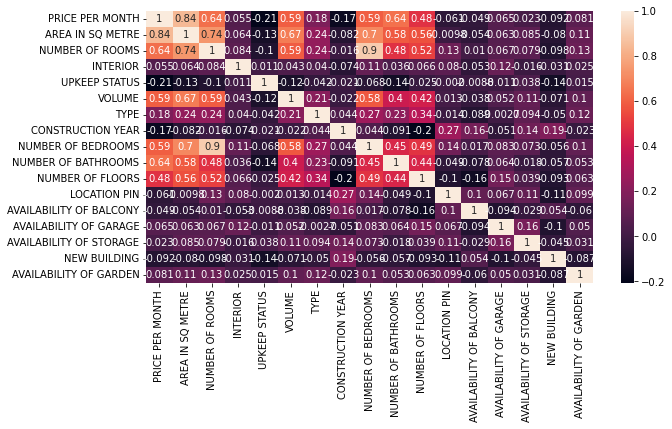

In [53]:
# heatmap for showing correlation between features
plt.figure(figsize=(10,5))
sns.heatmap(df_ams.corr(),annot=True)
plt.show()

In [54]:
# dropping columns showing low correlation with price 
# drop 'NUMBER OF BEDROOMS' beacuse of multicollinearity
df_ams.drop(columns=['TYPE','AVAILABILITY OF BALCONY',
                     'AVAILABILITY OF GARAGE',
                     'INTERIOR',
                     'NUMBER OF BEDROOMS',
                     'AVAILABILITY OF STORAGE',
                     'LOCATION PIN',
                     'AVAILABILITY OF GARDEN',
                     'NEW BUILDING',
                     'UPKEEP STATUS',
                     'CONSTRUCTION YEAR'],axis=1,inplace=True)

In [55]:
# correlation of features with price
df_ams.corr()['PRICE PER MONTH']

PRICE PER MONTH        1.000000
AREA IN SQ METRE       0.843338
NUMBER OF ROOMS        0.635015
VOLUME                 0.591618
NUMBER OF BATHROOMS    0.641717
NUMBER OF FLOORS       0.477341
Name: PRICE PER MONTH, dtype: float64

In [56]:
df_ams

,PRICE PER MONTH,AREA IN SQ METRE,NUMBER OF ROOMS,VOLUME,NUMBER OF BATHROOMS,NUMBER OF FLOORS
0,2400,84,3,160.0,1,1
1,3250,120,4,325.0,1,3
2,2050,60,2,144.0,1,1
3,2250,95,2,300.0,1,1
4,2750,78,3,250.0,1,2
...,...,...,...,...,...,...
987,1915,95,4,370.0,1,1
988,2654,129,4,300.0,2,1
989,2750,132,4,343.0,1,1
990,1672,69,3,180.0,1,1


In [57]:
df_ams.columns

Index(['PRICE PER MONTH', 'AREA IN SQ METRE', 'NUMBER OF ROOMS', 'VOLUME',
       'NUMBER OF BATHROOMS', 'NUMBER OF FLOORS'],
      dtype='object')

In [58]:
# checking for duplicates and dropping them
df_ams.duplicated().sum()

52

In [59]:
df_ams.drop_duplicates(inplace=True)

# Modelling

In [60]:
X=df_ams.drop(['PRICE PER MONTH'],axis=1)
y=df_ams['PRICE PER MONTH']

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
# LASSO REGRESSION

In [64]:
# Create a lasso regression model
model = Lasso()

# Create a dictionary of hyperparameters to search
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
y_pred = grid_search.predict(X_test_scaled)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
print("Mean Squared Error: %.3f" % mean_squared_error(y_test, y_pred))
print("Test score: %.4f" % (r2_score(y_test,y_pred)))

Best hyperparameters: {'alpha': 10}
Mean Squared Error: 354207.167
Test score: 0.7653


In [65]:
# RIDGE REGRESSION

In [66]:
# Create a ridge regression model
model = Ridge()

# Create a dictionary of hyperparameters to search
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)  #, return_train_score=True
grid_search.fit(X_train_scaled, y_train)
y_pred = grid_search.predict(X_test_scaled)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
print("Mean Squared Error: %.3f" % mean_squared_error(y_test, y_pred))
print("Test Score: %.4f" %grid_search.score(X_test_scaled,y_test))

Best hyperparameters: {'alpha': 10}
Mean Squared Error: 355440.530
Test Score: 0.7645


In [67]:
# RANDOM FOREST

In [68]:
# Create a random forest model
model = RandomForestRegressor()

# Define the hyperparameter search space
param_distributions = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV to tune the hyperparameters
random_search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=5, return_train_score=True)
random_search.fit(X_train_scaled, y_train)
y_pred = random_search.predict(X_test_scaled)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the model on the test set
print("Mean Squared Error: %.3f" % mean_squared_error(y_test, y_pred))
print("Test Score: %.3f" %random_search.score(X_test_scaled,y_test))

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 7}
Mean Squared Error: 386969.318
Test Score: 0.744


In [69]:
# XGBOOST REGRESSION

In [70]:
# Create a XGBoost model
model = XGBRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'reg_lambda': [0.1, 1.0, 10.0]
}

# Use grid search to tune the hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)
y_pred = grid_search.predict(X_test_scaled)

# Print the best hyperparameters
print(grid_search.best_params_)

# Evaluate the model on the test set
print("Mean Squared Error: %.3f" % mean_squared_error(y_test, y_pred))
print("Test Score: %.3f" %grid_search.score(X_test_scaled,y_test))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_lambda': 10.0}
Mean Squared Error: 419401.708
Test Score: 0.722
